# Comparing ML models in Sklearn

## Evaluation procedure 1: train and test

* Train the model on the entire dataset
* Test the model on the same dataset and evaluate how well it did by comparing the predicted response with the true response values

In [1]:
from sklearn.datasets import load_iris

# load iris data set from datasets modules
iris = load_iris()

# X: features y:reponse
X = iris.data
y = iris.target

## Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# Predict the response for observations in X
logreg.predict(X)

/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# store predicted values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

**Classification accuracy**
* **Proportion** of correct predictions
* Common evaluation metric for classification problems

In [4]:
# compuate classificacion accuracy for the logistic regression model
from sklearn import metrics
print (metrics.accuracy_score(y, y_pred))

0.96


* Known as **trainning accuracy** when you train and test the model with the same data

## KNN (K=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y, y_pred))

0.9666666666666667


## KNN (K=1)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print (metrics.accuracy_score(y, y_pred))

1.0


**Problems with training and testing with the same data**
* Objetive is to estimate likely performance of a model on out-of-sample data
* maximazing training accuracy gives overly complex models that won't necessarily generalize
* Unnecessary complex models overfit training data
* complex model follow the noise rather than the signal

## Evaluation precedure #2: train/test split

* Split the dataset in two: training set and testing set
* Train the model on the training set
* Test the model on the test set, and evaluate how well we did

In [7]:
# Print shape of feature and response
print(X.shape)
print(y.shape)

(150, 4)
(150,)


* STEP 1: Split X and y into training and testing sets

In [8]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

* 60% of the dataset is used to train the model, 40% is used to test the model
* training and testing are performed on different sets of data
* Response values are known for the testing set then predictions can be evaluated
* the sets are choosen randomly, but using random_state = integer we fix the way the dataset are choosen (random seed)

In [9]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [10]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


* STEP 2: Train model on the training set

In [11]:
# STEP 2: train model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jbohorquez/Documents/ML/ml-sklearn/ml-sklearn/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

* STEP 3: Make preditions on the testing set

In [12]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print (metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


### KNN (K=5)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### KNN (K=1)

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.95


**FINDING THE BEST K-VALUE**

In [15]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

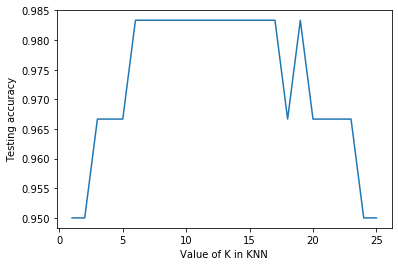

In [19]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Testing accuracy')
plt.show()


* **Training accuracy** rises as model complexity increases
* **Testing accuracy** penalizes models that are too complex or not complex enough
* For KNN models, complexity is determined by the value of K, (lower value=more complex)
* In this case, we can say that the **best** k-parameter is K=11 (value in the middle of the large testing accuracy score)

In [25]:
# Making a prediction with a out-of-sample data using the best k-parameter
# with ALL the dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
knn.predict([[3,5,4,2]])

array([1])

**Predicted iris: 'versicolor'**